[
  {
    "iteration": 0,
    "status": {
      "0": 0,
      "1": 0,
      "2": 0,
      "3": 0,
      "4": 0,
      "5": 0,
      "6": 0,
      "7": 0,
      "8": 0,
      "9": 0,
      "10": 0,
      "11": 1,
      "12": 0,
      "13": 0,
      "14": 0,
      "15": 0,
      "16": 0,
      "17": 0,
      "18": 0,
      "19": 0,
      "20": 0,
      "21": 0,
      "22": 0,
      "23": 0,
      "24": 0,
      "25": 0,
      "26": 0,
      "27": 0,
      "28": 0,
      "29": 1,
      "30": 0,
      "31": 0,
      "32": 0,
      "33": 0,
      "34": 0,
      "35": 0,
      "36": 0,
      "37": 0,
      "38": 0,
      "39": 0,
      "40": 0,
      "41": 1,
      "42": 0,
      "43": 0,
      "44": 0,
      "45": 0,
      "46": 0,
      "47": 0,
      "48": 0,
      "49": 0,
      "50": 0,
      "51": 0,
      "52": 0,
      "53": 0,
      "54": 0,
      "55": 0,
      "56": 0,
      "57": 0,
      "58": 0,
      "59": 0,
      "60": 1,
      "61": 0,
      "62": 0,
      "63": 0,
      "6

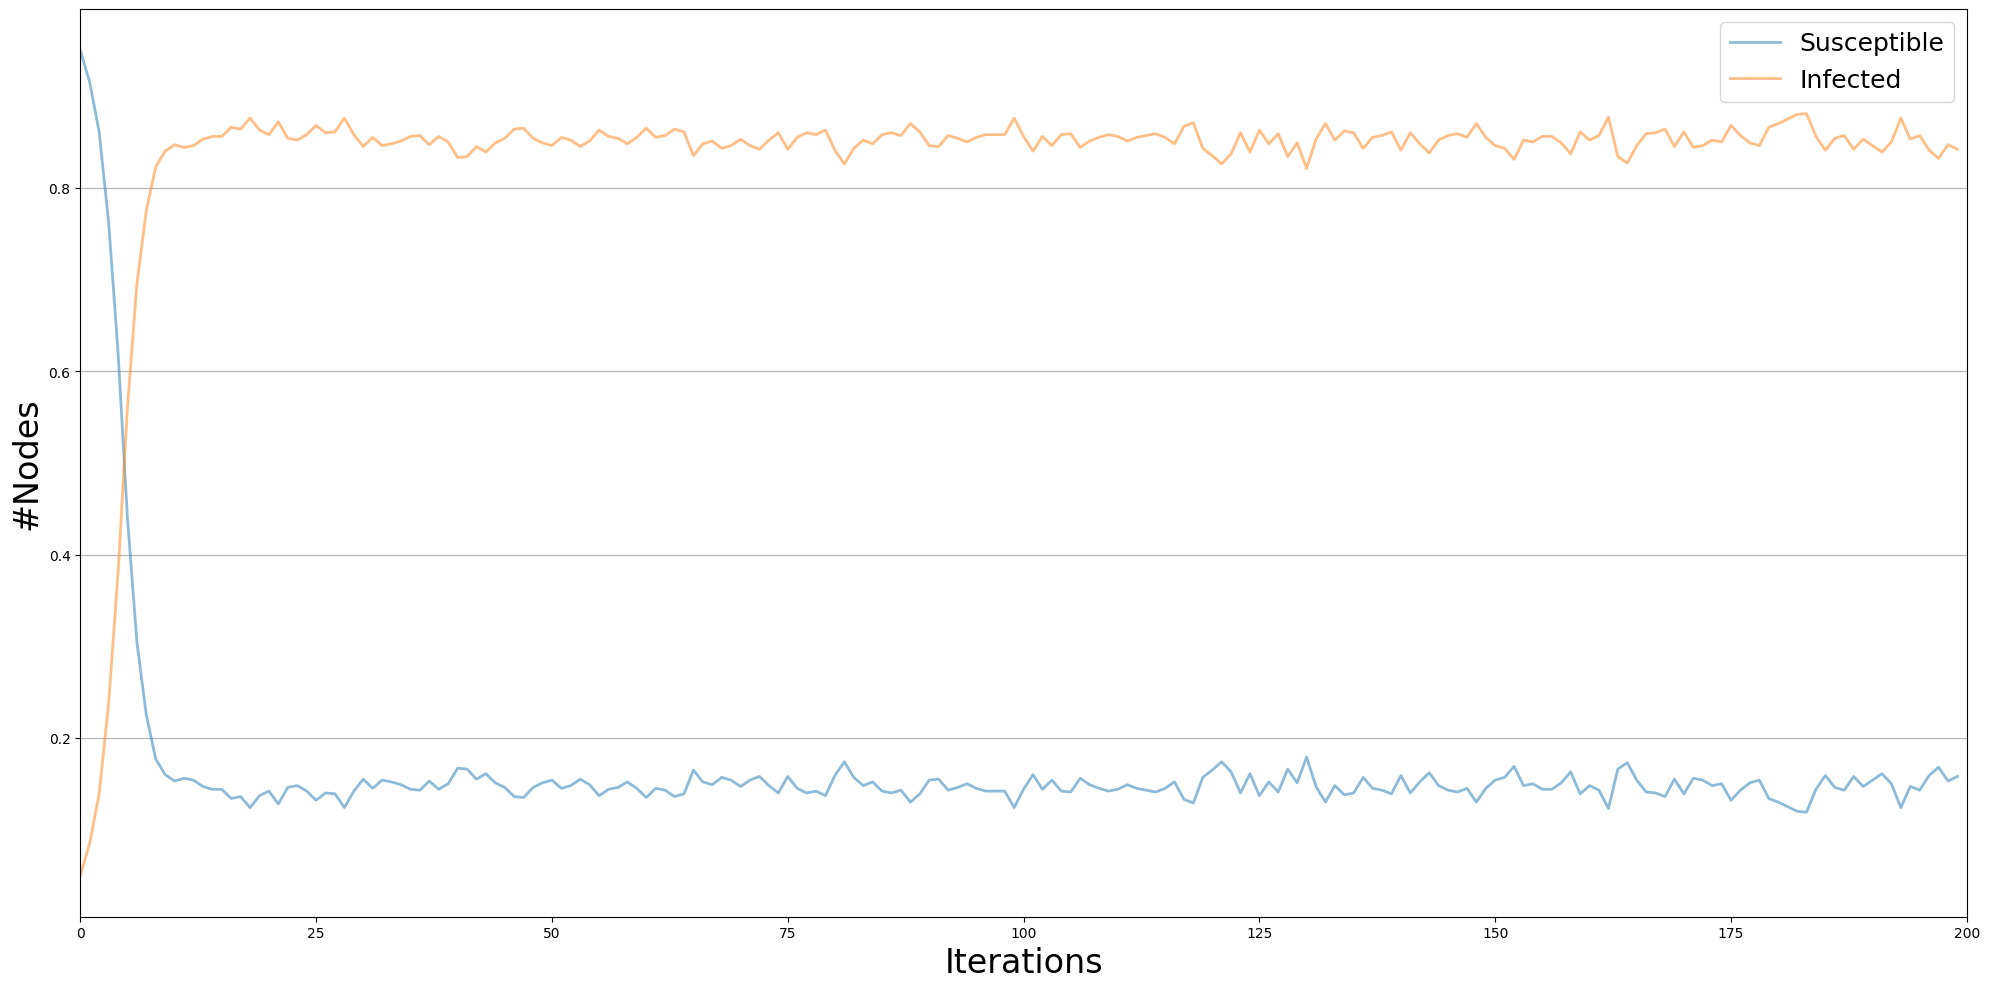

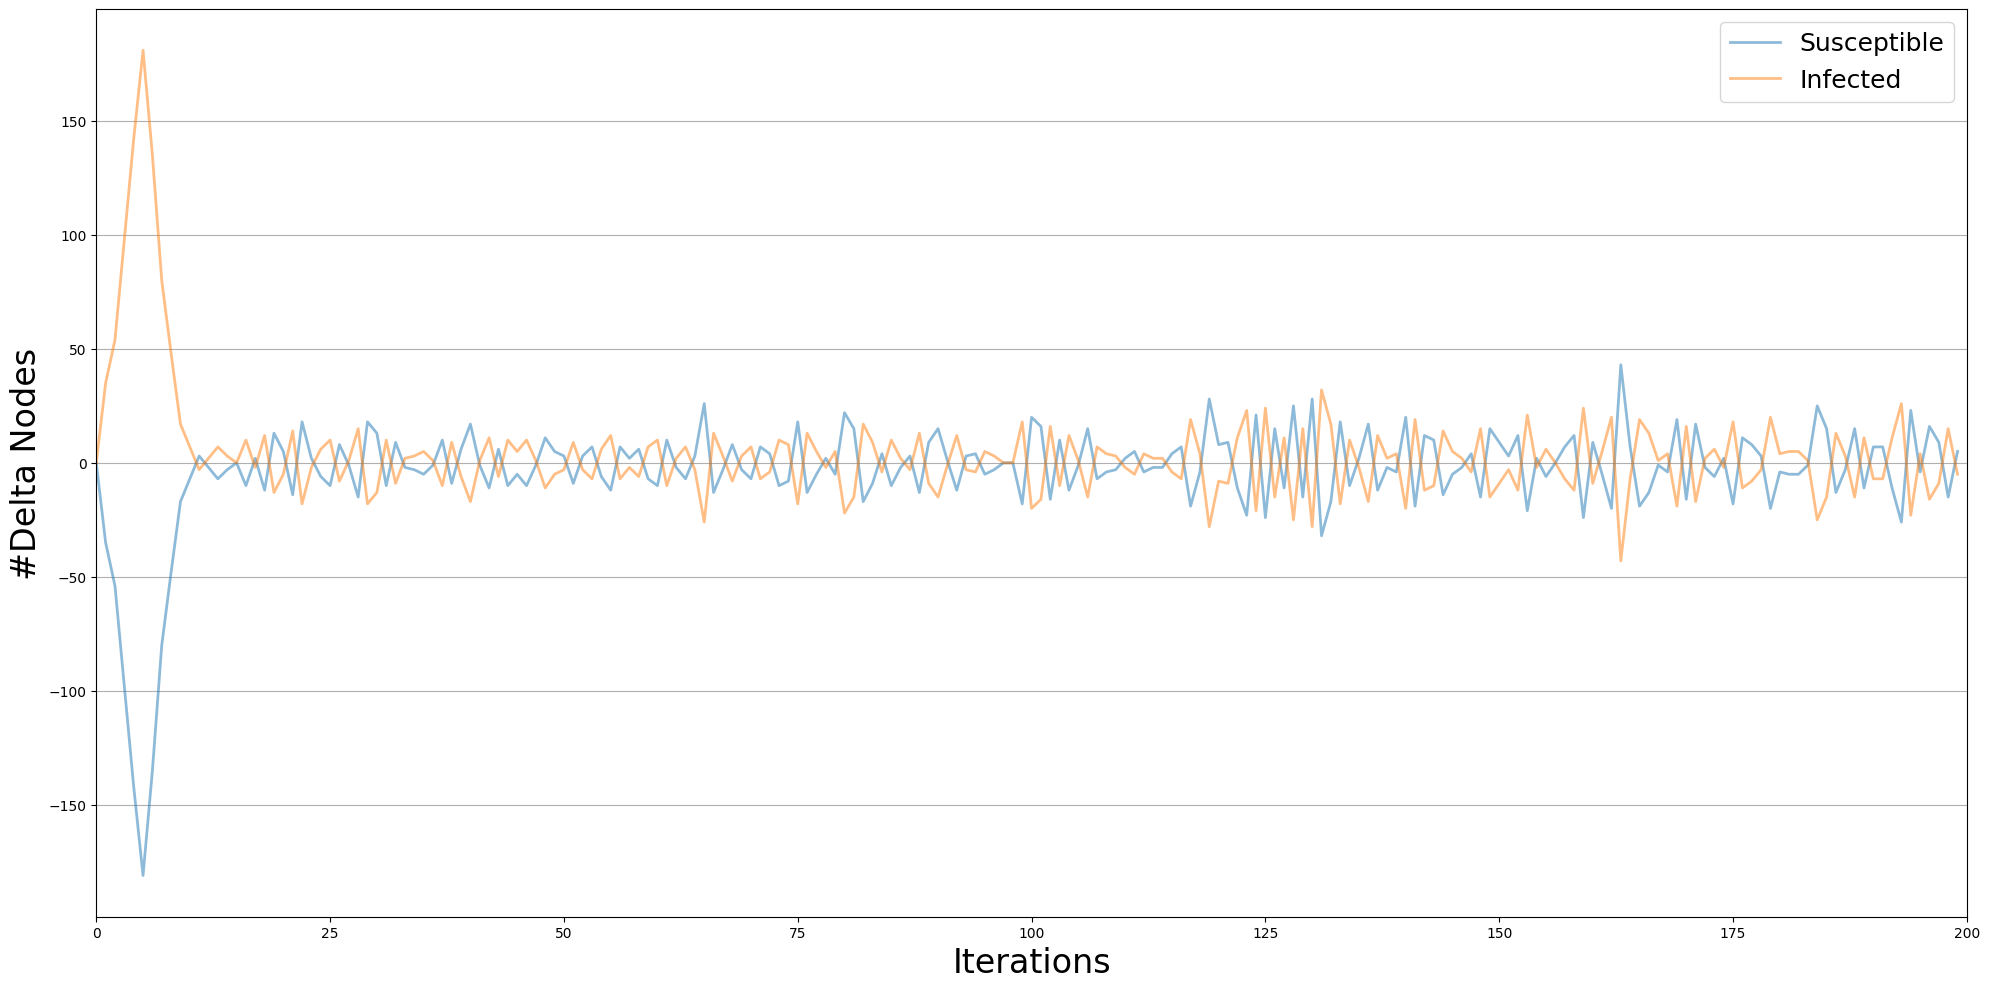

In [17]:
'''
SIS model assumes that if, during a generic iteration, a susceptible node comes into contact with 
an infected one, it becomes infected with probability beta, than it can be switch again to 
susceptible with probability lambda (the only transition allowed are S→I→S).

Statuses:
    - 0: susceptible
    - 1: infected

Parameters:
    - beta: infection probability (float in [0,1])
    - lambda: recovery probability (float in [0,1])
    - fraction_infected: fraction of initially infected nodes
    - infected: list of infected nodes (has priority over fraction_infected)
    
Note: 
    - an infected and recovered node can be re-infected
'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
import json

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
sis_model = ep.SISModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.01)
config.add_model_parameter('lambda', 0.1)
config.add_model_parameter("fraction_infected", 0.05)
sis_model.set_initial_status(config)

# Simulation execution
iterations = sis_model.iteration_bunch(200, node_status=True)
print(json.dumps(iterations, indent=2))
trends = sis_model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(sis_model, trends)
viz.plot()

viz = DiffusionPrevalence(sis_model, trends)
viz.plot()